<div style="background: #D5CFF9; padding: 10px; border: 0.5px #B0E0E6; border-radius: 10px;"> 
    
**Название проекта**
    
Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста
    
_____
    
    
**Описание исследования**
    
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 
    
_____
    
    
**Цель исследования**
    
Приоритизировать гипотезы, затем выбрать самую подходящую и провести A/B-тест. Проанализировать A/B-тест и принять решение по его результатам:
1. Остановить тест и зафиксировать победу одной из групп.
2. Остановить тест и зафиксировать отсутствие различий между группами.
3. Продолжить тест.
    
_____
**Исходные данные**
    
*Данные для первой части:*

Файл hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

*Данные для второй части:*

Файл orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

______
    

**Данное исследование разделим на несколько частей.**

**[Часть 1. Приоритизация гипотез:](#part1)**
* [1. Применение фреймворка ICE для приоритизации гипотез, их сортировка по убыванию приоритета.](#part1.1)
* [2. Применение фреймворка RICE для приоритизации гипотез, их сортировка по убыванию приоритета.](#part1.2)
* [3. Выяснение, как изменилась приоритизация гипотез при применения RICE вместо ICE и почему так произошло.](#part1.3)

**[Часть 2. Анализ A/B-теста:](#part2)**
* [1. Изученеие файлов с данными, получение общей информации, корректировка данных.](#part2.1)
  * [1.1. Изучение и предобработка датафрейма orders.](#part2.1.1)
  * [1.2. Изучение и предобработка датафрейма visitors.](#part2.1.2)
* [2. Построение графика кумулятивной выручки по группам, написание выводов и предположений.](#part2.2)
* [3. Построение графика кумулятивной среднего чека по группам, написание выводов и предположений.](#part2.3)
* [4. Построение графика относительного изменения кумулятивного среднего чека группы В к группе А, написание выводов и предположений.](#part2.4)
* [5. Построение графика кумулятивного среднего количества заказов на посетителя по группам, написание выводов и предположений.](#part2.5)
* [6. Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, написание выводов и предположений.](#part2.6)
* [7. Построение точечного графика количества заказов по пользователям, написание выводов и предположений.](#part2.7)
* [8. Расчёт 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.](#part2.8)
* [9. Построение точечного графика стоимостей заказов, написание выводов и предположений.](#part2.9)
* [10. Расчёт 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных пользователей.](#part2.10)
* [11. Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным, написание выводов и предположений.](#part2.11)
* [12. Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным, написание выводов и предположений.](#part2.12)
* [13. Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, написание выводов и предположений.](#part2.13)
* [14. Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным, написание выводов и предположений.](#part2.14)
* [15. Принятие решения по результатам теста и его объяснение.](#part2.15)
    
_________________
    
    
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import datetime as dt

pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 400)
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

<a id='part1'></a>
## Часть 1. Приоритизация гипотез

<a id='part1.1'></a>
### 1. Применение фреймворка ICE для приоритизации гипотез, их сортировка по убыванию приоритета.

In [2]:
# поместим датасет с гипотезами в переменную hypothesis
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# добавим столбец ICE в таблицу с гипотезами
hypothesis['ICE'] = round(((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']), 2)

# выведем список гипотез, отсортировав их по столбцу ICE
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Промежуточный вывод:**

Наиболее перспективные гипотезы: 
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

<a id='part1.2'></a>
### 2. Применение фреймворка RICE для приоритизации гипотез, их сортировка по убыванию приоритета.

In [4]:
# добавим столбец RICE в таблицу с гипотезами
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

# выведем список гипотез, отсортировав их по столбцу ICE
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Промежуточный вывод:**

Наиболее перспективные гипотезы изменились по сравнению с ICE: 
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

<a id='part1.3'></a>
### 3. Выяснение, как изменилась приоритизация гипотез при применения RICE вместо ICE и почему так произошло.

In [5]:
# выведем список гипотез, сортируем по RICE по убыванию
display(hypothesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод:**
- самая перспективная гипотеза по мнению ICE, гипотеза **"Запустить акцию, дающую скидку на товар в день рождения"**, не попала даже в топ-4 по приоритизации RICE. Случилось так из-за того, что показатель охвата (Reach) по гипотезе 8 оказался слишком низким (1 балл из 10), что понизило его в топе. Это закономерно, так как скидка, дающаяся только в день рождения пользователя, охватывает совсем небольшое количество людей, родившихся на текущую дату. Следовательно, не рекомендовал бы проводить А/В-тест по данной гипотезе.
- гипотеза **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** занимала 3-е место по ICE и стала занимать 1-е место по RICE также благодаря показателю охвата, который получил 10 баллов по данной гипотезе. Это также закономерно: форма подписки будет показана каждому посетителю сайта.
- гипотеза **"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"** попала в список перспективных за счёт величины охвата: блоки с рекомендациями затрагивают большинство пользователей.

<a id='part2'></a>
## Часть 2. Анализ A/B-теста

<a id='part2.1'></a>
### 1. Изученеие файлов с данными, получение общей информации, корректировка данных.

In [6]:
# поместим датафреймы в переменные
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

# изменим название столбцов orders на более подходящие
# для будущего анализа А/В-теста
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']

<a id='part2.1.1'></a>
#### 1.1. Изучение и предобработка датафрейма orders

In [7]:
# взглянем на различные строки orders
orders.sample(10)

,orderId,userId,date,revenue,group
76,1110904493,2587526707,2019-08-16,4400,A
575,212815314,2054014923,2019-08-04,5249,A
823,2971973105,199603092,2019-08-27,2790,A
696,198999602,3659263677,2019-08-09,2390,A
1096,3075787818,3062433592,2019-08-12,32610,B
382,1794917688,252987601,2019-08-03,2540,A
1156,1254962016,2654030115,2019-08-14,1980,A
130,3650380616,4258103007,2019-08-22,6145,B
372,1139821076,2488182306,2019-08-24,390,B
56,900025958,5114589,2019-08-16,570,B


**Промежуточный вывод:**
- формат даты кажется подходящим, также как и столбца revenue. Среди групп присутствуют группы А и В, но, чтобы в этом удовостовериться, следует это проверить

In [8]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [9]:
# посчитаем разницу в процентах между количеством заказов
# по группе А и В
print('Разница между количеством заказов в группе А и В составляет:', \
      '{:.2%}'.format((640 - 557) / 557), \
      'или {} заказа'.format(640 - 557))

Разница между количеством заказов в группе А и В составляет: 14.90% или 83 заказа


**Промежуточный вывод:**
- заказы в самом деле поделены только на две группы А и В
- в группах разное количество заказов, причём разница велика (почти 15%). Для корректного проведения А/В-теста группы должны быть равны, следовательно, из группы В следует исключить 83 случайных заказа

<div class="alert alert-info"> <b>Комментарий студента:</b> В общем, исходя из вывода выше я думал, как исключить 83 значения так, чтобы они были взяты хотя бы частично случайно, чтобы на навредить выборке, при этом чтобы и у вас, и у меня были удалены одинаковые числа, чтобы цифры в результате анализа у нас сходились. Я понимаю, что нужно упорядочить данные, и нужен какой-то метод, который удалял бы каждый четырнадцатый заказ (1197 / 83 = ~14.4). Я написал по этому поводу преподавателю в пачке, на что он мне ответил, что не нужно ничего удалять, стат.тест нормально отработает и при не равных группах. Поэтому оставляю здесь, как есть. </div>

In [10]:
# взглянем на общую информацию об orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   orderId  1197 non-null   int64 
 1   userId   1197 non-null   int64 
 2   date     1197 non-null   object
 3   revenue  1197 non-null   int64 
 4   group    1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


**Промежуточный вывод:**
- пропусков нет
- тип данных для date следует привести к формату datetime

In [11]:
orders['date'] = pd.to_datetime(orders['date'])

In [12]:
# посчитаем дубликаты orders
orders.duplicated().sum()

0

In [13]:
# взглянем на временной интервал проведения теста по orders
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


**Промежуточный вывод:**

Тест будет првоодиться весь август 2019 года, 31 день.

In [14]:
# посмотрим, не состоят ли пользователи в обеих группах
intersection = pd.Series(list((set(orders.query('group == "A"')['userId']) \
                               & set(orders.query('group == "B"')['userId']))))

print('Количество пользователей, попавших в обе группы:', intersection.count())

Количество пользователей, попавших в обе группы: 58


**Промежуточный вывод:**

58 пользователей попали в обе группы. Пересечение групп сильно влияет на результаты теста, следовательно, исключим их.

In [15]:
orders = orders.query('userId not in @intersection')

<a id='part2.1.2'></a>
#### 1.2. Изучение и предобработка датафрейма visitors

In [16]:
# взглянем на различные строки visitors
visitors.sample(10)

,date,group,visitors
46,2019-08-16,B,413
56,2019-08-26,B,676
19,2019-08-20,A,575
6,2019-08-07,A,644
8,2019-08-09,A,617
12,2019-08-13,A,748
2,2019-08-03,A,507
29,2019-08-30,A,490
7,2019-08-08,A,610
34,2019-08-04,B,770


**Промежуточный вывод:**
 - среди групп присутствуют группы А и В, но, чтобы в этом удовостовериться, следует это проверить

In [17]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

**Промежуточный вывод:**
- в датафрейме visitors всего 2 группы (А и В), при этом всё время проведения теста (31 день) каждый день тестируются обе группы.

In [18]:
# взглянем на общую информацию о visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Промежуточный вывод:**
- пропусков нет
- тип данных для date следует привести к формату datetime

In [19]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [20]:
# проверим датафрейм на наличие дубликатов
visitors.duplicated().sum()

0

<a id='part2.2'></a>
### 2. Построение графика кумулятивной выручки по группам, написание выводов и предположений.

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                                                     orders['group'] == x['group'])]
                                .agg({'date' : 'max', 'group' : 'max', \
                                      'orderId' : 'nunique', 'userId' : 'nunique', \
                                      'revenue' : 'sum'}), axis=1)
                                .sort_values(by=['date','group'])
                   )

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                                                                         visitors['group'] == x['group'])]
                                 .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                                 .sort_values(by=['date','group'])
                     )

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

In [22]:
# проверим, совпадают ли минимальная и максимальная даты
# в датафрейме cumulativeData с оными в исходных данных

print('Дата начала теста:', cumulativeData['date'].min())
print('Дата окончания теста:', cumulativeData['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


**Промежуточный вывод:**
- минимальная и максимальная дата исходных данных совпадает с минимальной и максимальной датой cummulativeData.

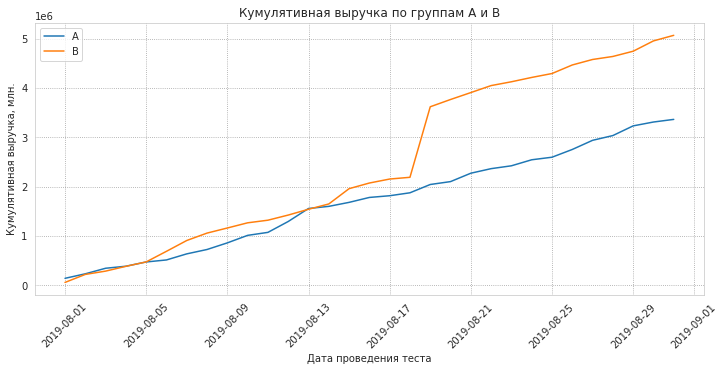

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

# строим график кумулятивной выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график кумулятивной выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по группам А и В')
plt.ylabel('Кумулятивная выручка, млн.')
plt.xlabel('Дата проведения теста')
plt.xticks(rotation=45);

**Промежуточный вывод:**

Кумулятивная выручка по группе В стабильно выше выручки по группе А, хотя 18 числа происходит скачок, вероятно, из-за достаточно дорогого заказа или увеличившейся конверсии. Из-за того, что выручка группы В была выше и до 18 числа, сомневаюсь, что очищение данных от аномалий разительно изменит ситуацию и выручка по группе А станет выше, однако, возможно, следовало бы перестраховаться и позже взглянуть на график кумулятивной выручки без выбросов.

<a id='part2.3'></a>
### 3. Построение графика кумулятивного среднего чека по группам, написание выводов и предположений.

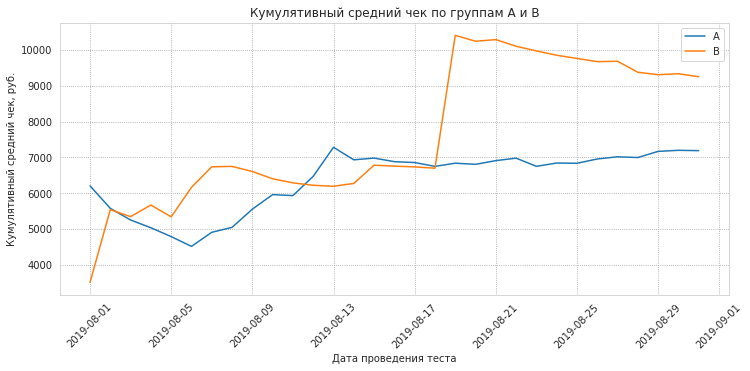

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

# строим график кумулятивного среднего чека группы А, иными словами,
# разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')

# строим график кумулятивной среднего чека группы B, иными словами,
# разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('Кумулятивный средний чек по группам А и В')
plt.ylabel('Кумулятивный средний чек, руб.')
plt.xlabel('Дата проведения теста')
plt.xticks(rotation=45);

**Промежуточный вывод:**

Гипотеза с дорогим заказом подтверждается. 18 числа средний чек увеличивается до 10000 и начинает медленное снижение. Нынешней продолжительности теста не хватает, чтобы сказать точно, что кумулятивный средний чек группы В будет стабильно выше группы А. С другой стороны, почти с самого начала группа В выше группы А, и только в одном месте, где, вероятно, тоже были аномалии, средний чек группы А превышает оный группы В. На мой взгляд, следовало бы очистить данные от аномалий, однако предполагаю, что вывод будет тот же: средний кумулятивный чек группы В будет стабильно выше группы А.

<a id='part2.4'></a>
### 4. Построение графика относительного изменения кумулятивного среднего чека группы В к группе А, написание выводов и предположений.

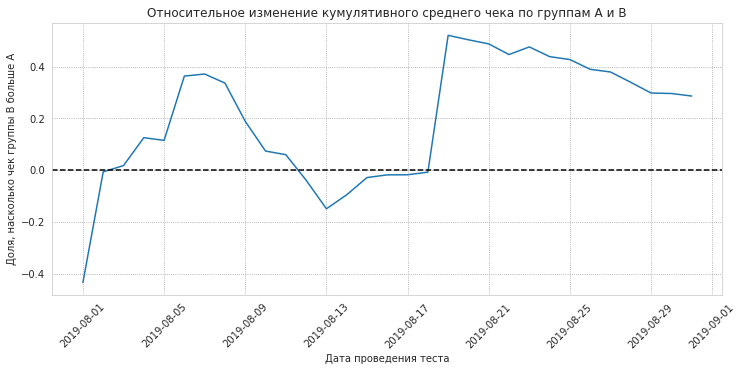

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', \
                                                   right_on='date', how='left', \
                                                   suffixes=['A', 'B'])

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) \
          / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека по группам А и В')
plt.ylabel('Доля, насколько чек группы В больше А')
plt.xlabel('Дата проведения теста')
plt.xticks(rotation=45);

**Промежуточный вывод:**

График примерно аналогичен предыдущему: большую часть времени группа В превалирует, на нескольких скачках среднего чека группы А относительное изменение падает ниже 0 (на уровне 13 августа). Различие между группами сильно скачает почти по всему графику, что снова наталкивает на мысль о наличии выбросов. В целом, можно снова сказать, что средний кумулятивный чек группы В выше, однако следует избавиться от аномалий.

<a id='part2.5'></a>
### 5. Построение графика кумулятивного среднего количества заказов на посетителя по группам, написание выводов и предположений.

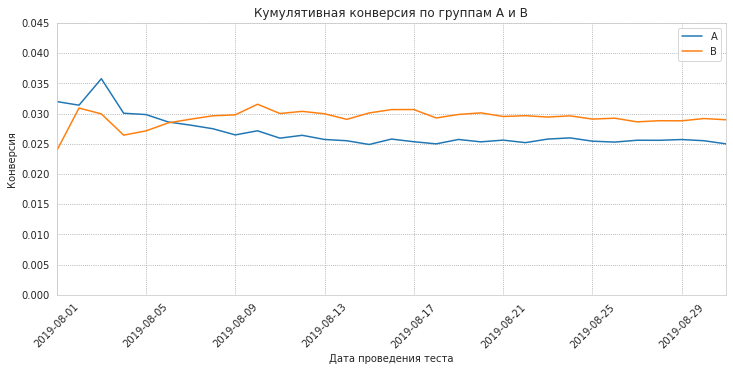

In [26]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

# строим график кумулятивного среднего количества заказов на посетителя группы А
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')

# строим график кумулятивного среднего количества заказов на посетителя группы В
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам А и В')
plt.ylabel('Конверсия')
plt.xlabel('Дата проведения теста')
plt.xticks(rotation=45)

# зададим масштаб осей
plt.axis([orders['date'].min(), orders['date'].max(), 0, 0.045]);

**Промежуточный вывод:**

После некоторых колебаний график становится более или менее стабильным, конверсия группы В достаточно рано вырвалась вперёд и зафиксировалась.

<a id='part2.6'></a>
### 6. Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, написание выводов и предположений.

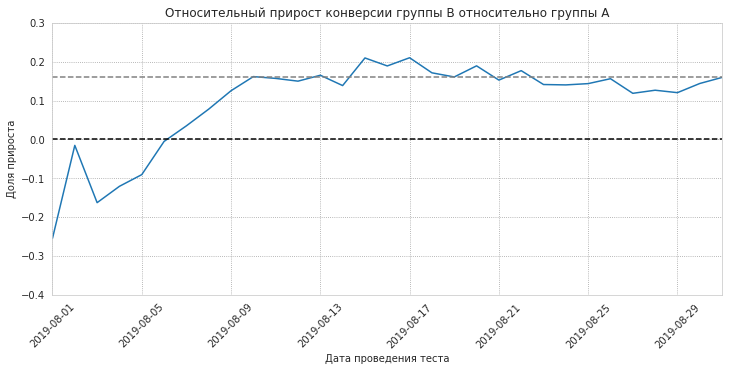

In [27]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], \
                                      left_on='date', right_on='date', how='left', \
                                      suffixes=['A', 'B'])
                              )

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.ylabel('Доля прироста')
plt.xlabel('Дата проведения теста')

# зададим масштаб осей
plt.axis([orders['date'].min(), orders['date'].max(), -0.4, 0.3]);

**Промежуточный вывод:**

Конверсия группы В почти с самого начала с небольшими колебаниями выше конверсии группы А, и на последний день снова стремится вверх/закрепляется на уровне 16%. Трудно сказать, что отношение конверсии ещё не установилось, несмотря на имеющиеся, вероятно, из-за аномалий колебания, конверсия группы В стабильно выше конверсии группы А. Возможно, избавление от аномалий сделает график более плавным и стабильным, но вердикт, вероятно, останется тем же.

<a id='part2.7'></a>
### 7. Построение точечного графика количества заказов по пользователям, написание выводов и предположений.

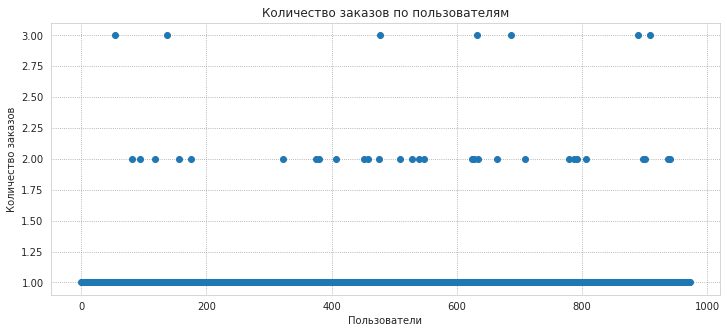

In [28]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

# построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0, len(ordersByUsers)))

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи');

**Промежуточный вывод:**

Подавляющее большинство пользователей делает 1 заказ, даже 2 заказа кажутся редким явлением. Предположу, что 2 заказа не войдут даже в 95-й процентиль. На фоне наиболее частого заказа (одного) имеем не малое количество выбросов (количество заказов от 2). Следует посчитать выборочные перцентили количества заказов на одного пользователя, чтобы лучше понимать, какое количество относить к аномалиям.

<a id='part2.8'></a>
### 8. Расчёт 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [29]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


**Промежуточный вывод:**

Не более 5% пользователей оформляли больше 2 заказов. Выберем 95-й перцентиль за границу для определения аномальных пользователей, иными словами, не берём в расчёт заказы более двух при анализе результатов.

<a id='part2.9'></a>
### 9. Построение точечного графика стоимостей заказов, написание выводов и предположений.

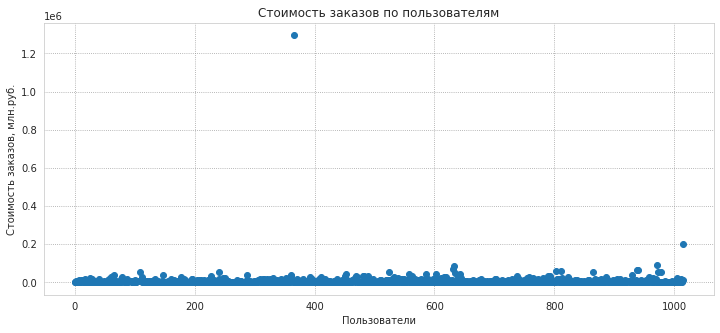

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов по пользователям')
plt.ylabel('Стоимость заказов, млн.руб.')
plt.xlabel('Пользователи');

**Промежуточный вывод:**

Из графика точно не ясно, какое значение считать за типичную стоимость заказа. Имеются аномальные заказы приблизительно от 20000, а также два очень дорогих заказа по 200000 и 1250000. Построим новый график без учёта аномалий, чтобы лучше понять, какова типичная стоимость заказов.

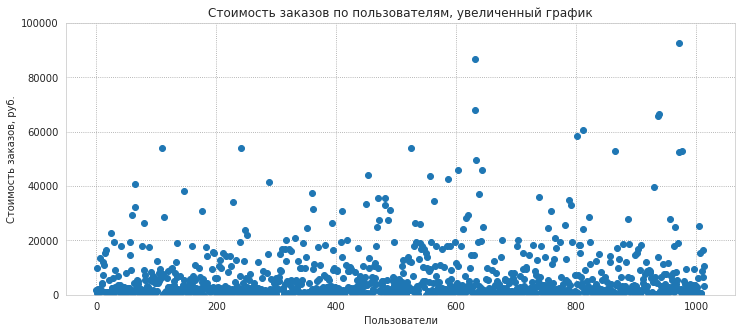

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.title('Стоимость заказов по пользователям, увеличенный график')
plt.ylabel('Стоимость заказов, руб.')
plt.xlabel('Пользователи');

**Промежуточный вывод:**

Большинство заказов составляют до 30000, однако даже свыше этого значения заказов не мало. Чтобы более точно узнать среднюю стоимость заказов, по которому следует отсеивать аномалии, следовало бы найти 95-й и 99-й перцентили. 

<a id='part2.10'></a>
### 10. Расчёт 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных пользователей.

In [32]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


**Промежуточный вывод:**

Предположение из предыдущего вывода оказалось, мягко говоря, не точным, что только подтверждает, что график был недостаточно информативным. При расчёте 95-го и 99-го перцентиля выяснилось, что 5% заказов стоят свыше 26785, и 1% - свыше приблизительно 53904. Выберем 95-й перцентиль за границу для отсева аномалий.

<a id='part2.11'></a>
### 11. Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным, написание выводов и предположений.

In [33]:
# посчитаем кол-во посетителей по дням в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# посчитаем кумулятивное количество посетителей 
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [34]:
# посчитаем количество заказов пользователя по группе А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# посчитаем количество заказов пользователя по группе В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# подготовим выборку по группе А, где каждому пользователю
# соответствует его количество заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# подготовим выборку по группе В, где каждому пользователю
# соответствует его количество заказов
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

```
H_0: Среднее число заказов группы А = Среднее число заказов группы В
H_1: Среднее число заказов группы А ≠ Среднее число заказов группы В
alpha = 0.05
```

In [35]:
# рассчитаем стат.значимость различий в числе заказов по критерию Манна-Уитни
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# выведем относительный прирост среднего числа заказов группы B
print('Относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


**Промежуточный вывод:**

*По "сырым" данным есть различия в среднем числе заказов между группами А и В.*
- p-value = 0.011 меньше 0.05, следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.
- среднее число заказов в группе В выше группы А на 16%

<a id='part2.12'></a>
### 12. Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным, написание выводов и предположений.

```
H_0: Средний чек группы А = Средний чек группы В
H_1: Средний чек группы А ≠ Средний чек группы В
alpha = 0.05
```

In [36]:
# рассчитаем стат.значимость различий в среднем чеке с помощью критерия Манна-Уитни
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], \
                                          orders[orders['group']=='B']['revenue'])[1]))

# выведем относительный прирост среднего чека группы В
print('Относительный прирост среднего чека группы B:', \
      '{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / \
                       orders[orders['group']=='A']['revenue'].mean() - 1))

p-value: 0.829
Относительный прирост среднего чека группы B: 0.287


**Промежуточный вывод:**

*По "сырым" данным различий в среднем чеке между группами нет.*
- p-value = 0.829 больше 0.05, следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.
- несмотря на это, средний чек группы В на 28.7% выше, чем у группы А.

<a id='part2.13'></a>
### 13. Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, написание выводов и предположений.

In [37]:
# за аномальных пользователей примем тех, кто совершил свыше 2 заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)

# за аномальных пользователей примем тех, кто совершил заказ свыше 53904
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['userId']

# объединим получившиеся таблицы в одну таблицу с аномальными пользователями
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [38]:
# очистим группу А от аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# очистим группу В от аномальных пользователей
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

```
H_0: Среднее число заказов группы А = Среднее число заказов группы В
H_1: Среднее число заказов группы А ≠ Среднее число заказов группы В
alpha = 0.05
```

In [39]:
# рассчитаем стат.значимость различий в числе заказов по критерию Манна-Уитни
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# выведем относительный прирост среднего числа заказов группы B
print('Относительный прирост среднего числа заказов группы B:', \
      '{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value: 0.008
Относительный прирост среднего числа заказов группы B: 0.188


**Промежуточный вывод:**

*По "очищенным" данным есть различия в среднем числе заказов между группами А и В.*
- p-value = 0.008 меньше 0.05, следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.
- среднее число заказов в группе В выше группы А на 18.8%. По сравнению с относительным приростом по "сырым" данным, избавление от аномалий увеличило относительный прирост числа заказов в группе В на 2.8% по сравнению с тем же в "сырых" данных (18.8% в "очищенных" против 16% против "сырых"). Предположу, что это произошло из-за того, что значительная часть аномальных пользователей принадлежало группе А. В поддержку этой гипотезы служит также понижение p-value в "чистых" данных по сравнению с "сырыми": избавление от аномальных пользователей чуть сильнее отдалило в схожести группы А и В. Учитывая то, что число заказов в группе В выше, были удалены аномалии, которые приближали по количеству заказов группу А к В.

<a id='part2.14'></a>
### 14. Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным, написание выводов и предположений.

In [40]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.969
Относительный прирост среднего чека группы B: 0.002


**Промежуточный вывод:**

*По "очищенным" данным различий в среднем чеке между группами нет.*
- p-value = 0.969 больше 0.05, следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. По сравнению с "сырыми" данными, стастистическая значимость в "очищенных" данных увеличилась на 0.09, что сделало данные в группах ещё менее отличимыми.
- по сравнению с "сырыми" данными, превосходство по относительному приросту в среднем чеке группы В было полностью нивелировано (28.7% относительного прироста в среднем чеке группы В в "сырых" данных против 0.02% в "очищенных")

<a id='part2.15'></a>
### 15. Принятие решения по результатам теста и его объяснение.

**Рекомендуется остановить тест и признать группу В победителем** по следующим причинам:
- согласно графику кумулятивной выручки по группам, кумулятивная выручка по группе В стабильно выше несмотря на аномалии. На выручку в нашем исследовании влияют два фактора: средний чек и количество заказов. Их мы изучим подробнее.
- согласно графикам кумулятивного среднего чека и относительного изменения кумулятивного среднего чека группы В к группе А, видим, что средний чек группы В стабильно выше среднего чека группы А, однако по-прежнему велико влияние аномальных пользователей. Чтобы быть уверенными в превосходстве группы В над А хотя бы по одному из показателей (средний чек и количество заказов), исключим аномалии, посчитаем относительный прирост по каждому показателю, а также статистическую значимость в различии групп:
  - средний чек: оказалось, что графики кумулятивного среднего чека были обманчивы благодаря аномалиям, потому что после их исключения выяснилось, что группы А и В по среднему чеку схожи, и относительный прирост группы В составляет 2% к группе А. Несмотря на это, по среднему чеку группа В имеет небольшое превосходство.
  - количество заказов: группы А и В значительно отличаются по количеству заказов, кроме того, относительный прирост группы составляет 28.7% к группе А. Большее количество заказов в группе В является причиной, по которой выручка на графике кумулятивной выручки стабильно выше выручки группы А. И эта та причина, по которой группа В признаётся победителем и, на мой взгляд, тест следует остановить.